In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

import numpy as np
from sparse_model_from_model import *

# Synthetic data

In [2]:
# observation, feature, action spaces dimensions
N = 10
s = N
o = N
f = N
a = N

# state/action transition matrices
#As = np.array([[0, 1], [1, 0]])
As = np.eye(N)
Aa = np.eye(N)

#As = np.random.randn(N, N) / N
#Aa = np.random.randn(N, N) / N

# encoder
E = np.random.randn(N, N)

In [3]:
states = np.random.randn(s, 1000)
actions = np.random.randn(a, 1000)
next_states = As @ states + Aa @ actions

observations = E @ states
next_observations = E @ next_states

xs = np.concatenate([observations, actions], axis=0)
ys = next_observations

# Fitting a linear model

In [4]:
W = LinearStateTransitionModel(o, a)

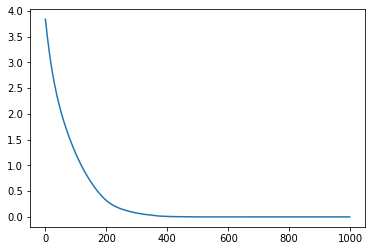

In [5]:
W.fit(xs.T, ys.T, epochs=1000)
W.plot_loss()

In [6]:
Wo, Wa = W.get_Wo_Wa()

# Simplifying the matrix...

In [7]:
sml = SparseModelLearner(Wo=Wo, Wa=Wa, f=f, p_ord=0.8, eps_dinv=1.,)

In [8]:
sml.fit(epochs=5000)

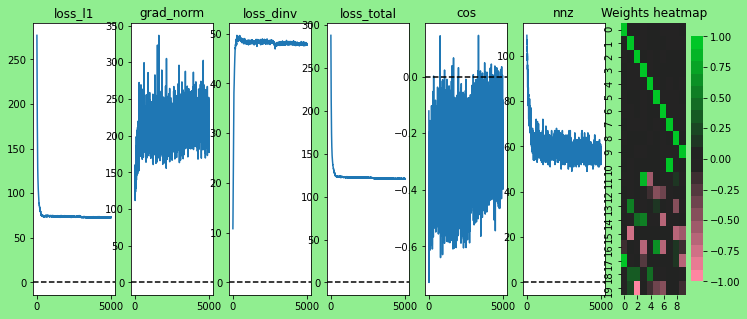

In [9]:
sml.process_results()

In [14]:
sml.weights_descent_pca_space(maxL=500)

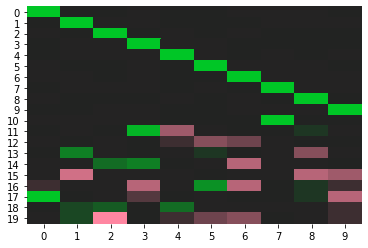

In [11]:
sml.animate_weights()